# 서울시 코로나 확진자 현황

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

### 데이터 파악하고 정리하기

In [2]:
df = pd.read_csv('./data/서울시 코로나19 확진자 현황.csv', encoding='euc-kr')
df.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,8966,11.30.,NaN,NaN,NaN,강북구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y
1,8965,11.30.,NaN,NaN,NaN,타시도,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y
2,8964,11.30.,NaN,NaN,NaN,타시도,NaN,감염경로 조사중,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y
3,8963,11.30.,NaN,NaN,NaN,영등포구,NaN,서초구 사우나 관련,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y
4,8962,11.30.,NaN,NaN,NaN,영등포구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8966 entries, 0 to 8965
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      8966 non-null   int64  
 1   확진일     8966 non-null   object 
 2   환자번호    0 non-null      float64
 3   국적      0 non-null      float64
 4   환자정보    0 non-null      float64
 5   지역      8966 non-null   object 
 6   여행력     549 non-null    object 
 7   접촉력     8966 non-null   object 
 8   조치사항    0 non-null      float64
 9   상태      6713 non-null   object 
 10  이동경로    7136 non-null   object 
 11  등록일     8966 non-null   object 
 12  수정일     8966 non-null   object 
 13  노출여부    8966 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 980.8+ KB


In [4]:
df['확진일'] = pd.to_datetime(df['확진일'].map(lambda s: '2020.'+s))
df['확진일'].head()

0   2020-11-30
1   2020-11-30
2   2020-11-30
3   2020-11-30
4   2020-11-30
Name: 확진일, dtype: datetime64[ns]

### 확진일자/지역으로 피봇테이블 만들기

In [5]:
pd.pivot_table(df, values='연번', index='확진일', columns='지역', aggfunc='count').head()

지역,강남구,강동구,강북구,강서구,경기도,관악구,광진구,구로구,금천구,기타,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-24,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN
2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
2020-02-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2020-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
corona_raw = pd.pivot_table(df, values='연번', index='확진일', columns='지역', aggfunc='count')
corona_raw.fillna(0, inplace=True)
corona_raw = corona_raw.astype(int)
corona_raw.head()

지역,강남구,강동구,강북구,강서구,경기도,관악구,광진구,구로구,금천구,기타,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-24,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2020-01-31,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,0,0,0
2020-02-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-02-05,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [7]:
del corona_raw['경기도']
del corona_raw['기타']
del corona_raw['타시도']
corona_raw['합계'] = corona_raw.sum(axis=1)
corona_raw.tail()

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,합계
확진일,,,,,,,,,,,,,,,,,,,,,
2020-11-26,5,2,1,56,8,1,7,4,11,3,...,4,10,14,5,6,2,2,2,11,189
2020-11-27,8,3,1,23,9,1,5,3,7,3,...,3,10,17,5,7,5,4,0,11,169
2020-11-28,6,5,2,15,3,6,7,2,13,5,...,7,6,11,5,2,4,1,3,8,150
2020-11-29,12,2,8,15,7,3,3,6,13,4,...,4,5,11,5,4,8,1,2,5,148
2020-11-30,12,5,4,15,7,5,5,2,7,7,...,7,7,10,14,3,3,0,1,4,145


In [8]:
corona_raw.to_csv('./results/coronaSeoul.csv', encoding='utf8')

### 월별, 구별 확진자수 구하기

In [9]:
corona = corona_raw.resample('M').sum()
corona

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,합계
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-31,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,3,0,1,7
2020-02-29,8,4,0,1,4,1,1,1,8,0,...,2,12,1,2,0,7,8,0,0,73
2020-03-31,36,6,5,20,30,5,33,11,12,6,...,12,15,17,18,12,14,3,5,12,369
2020-04-30,21,3,0,4,9,2,1,0,3,3,...,9,10,3,5,6,7,2,1,3,143
2020-05-31,11,11,9,20,16,6,6,3,8,10,...,5,11,6,11,20,7,3,3,3,216
2020-06-30,7,11,10,33,59,3,45,17,13,43,...,4,7,43,29,12,18,3,3,14,435
2020-07-31,15,14,4,25,27,5,5,7,6,2,...,9,44,0,7,4,11,6,8,11,268
2020-08-31,89,94,85,115,109,74,60,34,191,73,...,244,161,80,69,48,121,37,31,104,2248
2020-09-30,82,42,31,64,136,34,32,20,60,69,...,47,80,31,54,21,65,23,8,41,1179


In [14]:
corona.index = ['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월']
corona

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,합계
1월,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,3,0,1,7
2월,8,4,0,1,4,1,1,1,8,0,...,2,12,1,2,0,7,8,0,0,73
3월,36,6,5,20,30,5,33,11,12,6,...,12,15,17,18,12,14,3,5,12,369
4월,21,3,0,4,9,2,1,0,3,3,...,9,10,3,5,6,7,2,1,3,143
5월,11,11,9,20,16,6,6,3,8,10,...,5,11,6,11,20,7,3,3,3,216
6월,7,11,10,33,59,3,45,17,13,43,...,4,7,43,29,12,18,3,3,14,435
7월,15,14,4,25,27,5,5,7,6,2,...,9,44,0,7,4,11,6,8,11,268
8월,89,94,85,115,109,74,60,34,191,73,...,244,161,80,69,48,121,37,31,104,2248
9월,82,42,31,64,136,34,32,20,60,69,...,47,80,31,54,21,65,23,8,41,1179
10월,88,19,15,22,86,11,22,5,33,22,...,17,61,13,18,21,18,7,7,21,651


In [15]:
coronaT = corona.T
coronaT

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월
지역,,,,,,,,,,,
강남구,0,8,36,21,11,7,15,89,82,88,163
강동구,0,4,6,3,11,11,14,94,42,19,73
강북구,0,0,5,0,9,10,4,85,31,15,41
강서구,1,1,20,4,20,33,25,115,64,22,299
관악구,0,4,30,9,16,59,27,109,136,86,71
광진구,0,1,5,2,6,3,5,74,34,11,45
구로구,0,1,33,1,6,45,5,60,32,22,72
금천구,0,1,11,0,3,17,7,34,20,5,27
노원구,0,8,12,3,8,13,6,191,60,33,144


In [16]:
coronaT['합계'] = coronaT.sum(axis=1)
coronaT

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,합계
지역,,,,,,,,,,,,
강남구,0,8,36,21,11,7,15,89,82,88,163,520
강동구,0,4,6,3,11,11,14,94,42,19,73,277
강북구,0,0,5,0,9,10,4,85,31,15,41,200
강서구,1,1,20,4,20,33,25,115,64,22,299,604
관악구,0,4,30,9,16,59,27,109,136,86,71,547
광진구,0,1,5,2,6,3,5,74,34,11,45,186
구로구,0,1,33,1,6,45,5,60,32,22,72,277
금천구,0,1,11,0,3,17,7,34,20,5,27,125
노원구,0,8,12,3,8,13,6,191,60,33,144,478


In [17]:
coronaT = coronaT.iloc[:-1, :]
coronaT

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,합계
지역,,,,,,,,,,,,
강남구,0,8,36,21,11,7,15,89,82,88,163,520
강동구,0,4,6,3,11,11,14,94,42,19,73,277
강북구,0,0,5,0,9,10,4,85,31,15,41,200
강서구,1,1,20,4,20,33,25,115,64,22,299,604
관악구,0,4,30,9,16,59,27,109,136,86,71,547
광진구,0,1,5,2,6,3,5,74,34,11,45,186
구로구,0,1,33,1,6,45,5,60,32,22,72,277
금천구,0,1,11,0,3,17,7,34,20,5,27,125
노원구,0,8,12,3,8,13,6,191,60,33,144,478


### 그래프로 시각화하기

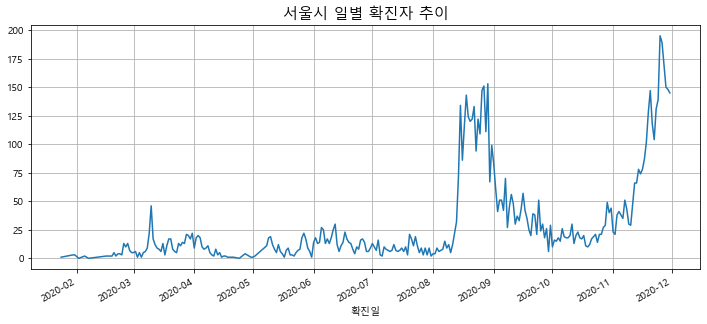

In [18]:
corona_raw['합계'].plot(grid=True, figsize=(12,5))
plt.title('서울시 일별 확진자 추이', fontsize=15)
plt.show()

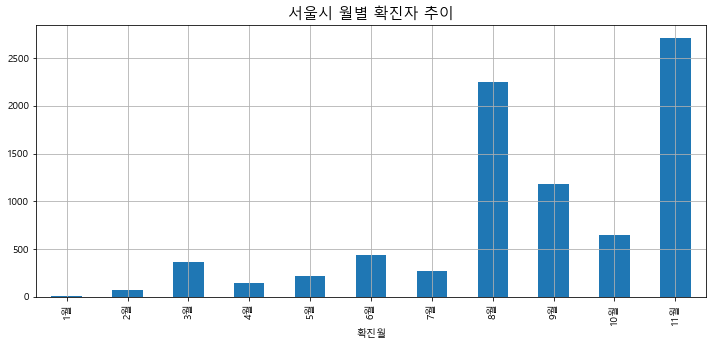

In [19]:
corona['합계'].plot(kind='bar', grid=True, figsize=(12,5))
plt.xlabel('확진월')
plt.title('서울시 월별 확진자 추이', fontsize=15)
plt.show()

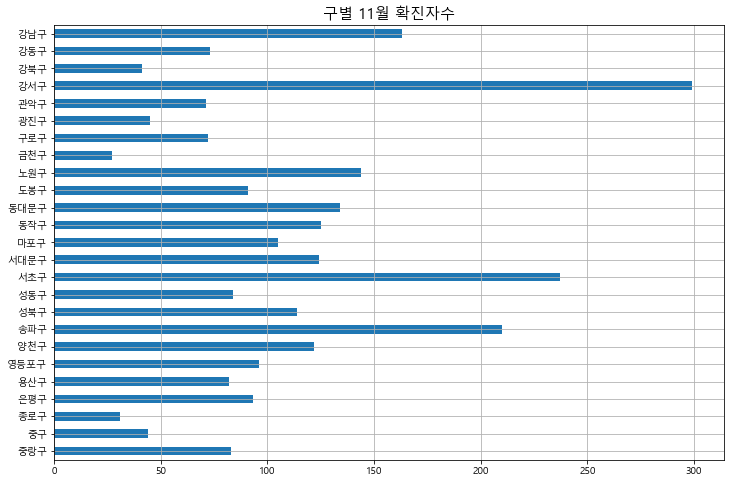

In [20]:
coronaT['11월'].sort_index(ascending=False).plot(kind='barh', grid=True, figsize=(12,8))
plt.title('구별 11월 확진자수', fontsize=15)
plt.ylabel('')
plt.show()

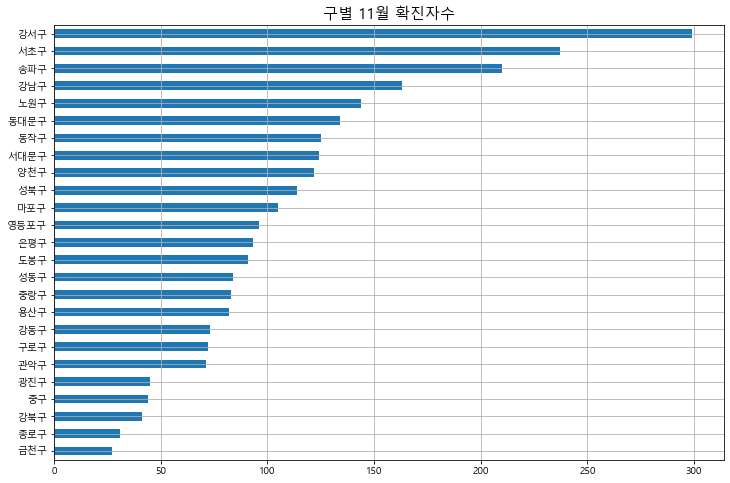

In [21]:
coronaT['11월'].sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('구별 11월 확진자수', fontsize=15)
plt.ylabel('')
plt.show()

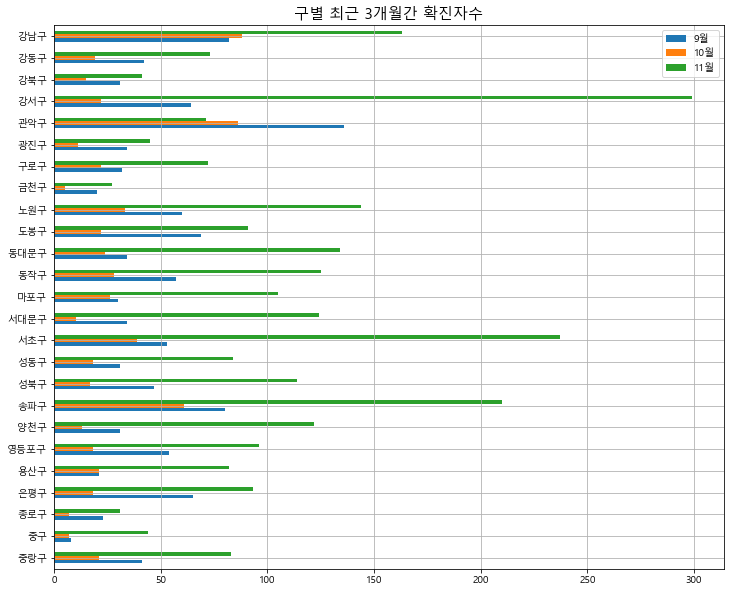

In [22]:
coronaT[['9월','10월','11월']].sort_index(ascending=False).plot(kind='barh', grid=True, figsize=(12,10))
plt.title('구별 최근 3개월간 확진자수', fontsize=15)
plt.ylabel('')
plt.show()

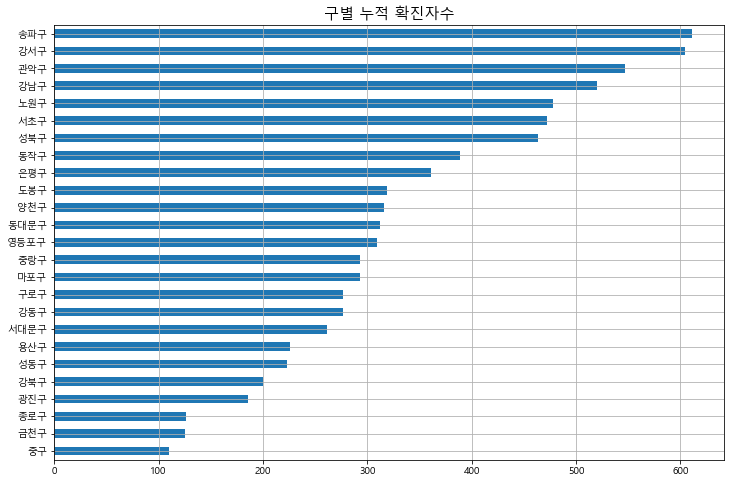

In [23]:
coronaT['합계'].sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('구별 누적 확진자수', fontsize=15)
plt.ylabel('')
plt.show()

### 구별 인구 데이터와 결합하기

In [24]:
pop = pd.read_csv('../07.Seoul/results/01.cctv.csv')
pop.set_index('구별', inplace=True)
pop.head()

,소계,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,cctv비율,오차
구별,,,,,,,,,,
강남구,5221,52.171379,544085,539235,4850,73942,0.891405,13.590156,0.959593,2579.013268
강동구,1879,82.960078,462275,458058,4217,68798,0.912228,14.882483,0.406468,526.315431
강북구,1265,83.068017,313550,309996,3554,62951,1.133472,20.076862,0.403444,710.063146
강서구,1617,77.887789,589536,583544,5992,88052,1.016393,14.935814,0.274284,1156.473682
관악구,3985,99.150425,514555,498574,15981,78206,3.105790,15.198764,0.774456,1428.441743


In [26]:
pop_corona = pd.DataFrame({'확진자수':coronaT['합계']})
pop_corona['인구수'] = pop['인구수']
pop_corona.head()

,확진자수,인구수
지역,,
강남구,520,544085
강동구,277,462275
강북구,200,313550
강서구,604,589536
관악구,547,514555


In [27]:
pop_corona['천명당 확진자 수'] = pop_corona['확진자수'] / pop_corona['인구수'] * 1000
pop_corona.head()

,확진자수,인구수,천명당 확진자 수
지역,,,
강남구,520,544085,0.955733
강동구,277,462275,0.599210
강북구,200,313550,0.637857
강서구,604,589536,1.024535
관악구,547,514555,1.063054


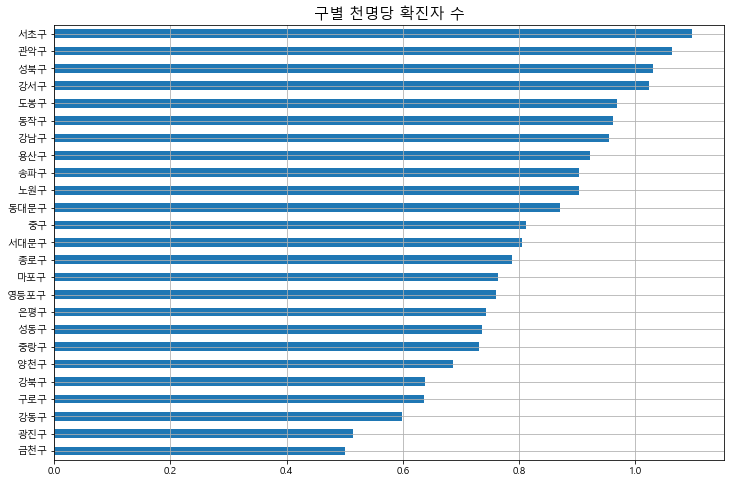

In [28]:
pop_corona['천명당 확진자 수'].sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('구별 천명당 확진자 수', fontsize=15)
plt.ylabel('')
plt.show()

### 지도 시각화

In [29]:
import folium
import json
geo_data = json.load(open('../07.Seoul/data/skorea_municipalities_geo_simple.json',
                         encoding='utf8'))

In [30]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
folium.Choropleth(geo_data = geo_data,
               data = pop_corona['확진자수'],
               columns = [pop_corona.index, pop_corona['확진자수']],
               fill_color = 'PuRd',
               key_on = 'feature.id').add_to(map)
title_html = '<h3 align="center" style="font-size:20px"><b>누적 확진자수</b></h3>'   
map.get_root().html.add_child(folium.Element(title_html))
map

In [31]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11,
                 tiles='Stamen Toner')
folium.Choropleth(geo_data = geo_data,
               data = pop_corona['천명당 확진자 수'],
               columns = [pop_corona.index, pop_corona['천명당 확진자 수']],
               fill_color = 'YlGnBu',
               key_on = 'feature.id').add_to(map)
title_html = '<h3 align="center" style="font-size:20px"><b>천명당 확진자 수</b></h3>'   
map.get_root().html.add_child(folium.Element(title_html))
map